<a href="https://colab.research.google.com/github/fishoe/aischool/blob/master/k_mean_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

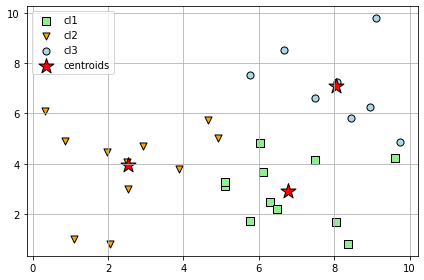

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def find_dist(pos1, pos2):
    return (pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2

def make_sample(n):
    col = ['x','y']
    sample_list = np.random.random([n,2])*10
    sample = pd.DataFrame(sample_list,columns=col)
    return sample

def make_init_pos(n,pos_list):
    center = center_pos(pos_list)
    result = []
    for i in range(n):
        r = center[0] if center[0] < center[1] else center[1]
        y=r*np.sin(2*np.pi/(i+1)) + center[1]
        x=r*np.cos(2*np.pi/(i+1)) + center[0]
        result.append(np.array([x,y]))
    return result


def center_pos(pos_list):
    center = np.array([0,0])
    for i in pos_list:
        center = center + i
    return center/len(pos_list)

def k_meanCluster(posList, nCluster):
    clusters = [[i,[]] for i in make_init_pos(nCluster,posList)]
    for i,pos in enumerate(posList) :
        min_dist = -1
        min_idx = 0
        for j in range(nCluster):
            temp = find_dist(pos,clusters[j][0])
            if min_dist == -1 or min_dist > temp:
                min_dist = temp
                min_idx = j
        clusters[min_idx][1].append(i)
    clusters_old = []
    while True :
        clusters_old = np.array([x[1] for x in clusters])
        clusters = []
        for i in range(nCluster):
            a = center_pos([posList[x] for x in clusters_old[i]])
            clusters.append([a,[]])
        for i, pos in enumerate(posList) :
            min_dist = -1
            min_idx = 0
            for j in range(nCluster):
                temp = find_dist(pos,clusters[j][0])
                if min_dist == -1 or min_dist >temp:
                    min_dist = temp
                    min_idx= j
            clusters[min_idx][1].append(i)
        clusters = np.array(clusters)
        if t.shape == clusters_old.shape :
        if (clusters_old == t).all() : break
    result = []
    for i in clusters:
        result.append([i[0],[posList[x] for x in i[1]]])
    return result

from sklearn.datasets import make_blobs

#sample = make_sample(30).values
sample,y = make_blobs(
    n_samples = 30,
    n_features = 2,
    centers = 3,
    cluster_std = 0.5,
    shuffle = True,
    random_state = 0
)
clst = k_meanCluster(sample, 3)

centers = np.array([x[0] for x in clst])

A = np.array(clst[0][1])
B = np.array(clst[1][1])
C = np.array(clst[2][1])

plt.scatter(A[:,0],A[:,1],s = 50, c = 'lightgreen',marker='s',edgecolor = 'black',
            label = 'cl1')
plt.scatter(B[:,0],B[:,1],s = 50, c = 'orange',marker='v',edgecolor = 'black',
            label = 'cl2')
plt.scatter(C[:,0],C[:,1],s = 50, c = 'lightblue',marker='o',edgecolor = 'black',
            label = 'cl3')
plt.scatter(centers[:,0],centers[:,1],s = 250, c = 'red',marker='*',edgecolor = 'black',
            label = 'centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()
